## Import the important libraries for project.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Dataset

In [31]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Checking for missing values in the dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Data preprocessing for changing categorical value into binary format.
            Here used OrdinalEncoder method for sklearn preprocessing library 

In [33]:
## Here, First change the heart disease feature into binary format like 0 is the absense of heart disease otherwise have heart disease
import category_encoders as ce
ecoder = ce.OrdinalEncoder(cols = ['Heart Disease'] , return_df = True , mapping = [{'col':'Heart Disease','mapping':{'Presence':1 , 'Absence': 0}}])
df['Heart Disease']= ecoder.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Feature selecting using three method.
                1. Univariate feature selection
                2. Correlation analysis
                3. sklearn ensemble ExtraTreesClassifier Method

## 1. Univariate feature selection

In [34]:
from sklearn.feature_selection import SelectKBest, chi2
from numpy import set_printoptions
X = df.iloc[:, 0:13]             # Here, data split into X and y. It help to find importance feature of the dataset
y = df.iloc[ :, 13] 
test = SelectKBest(score_func=chi2 , k=3)
fit = test.fit(X , y)
set_printoptions(precision = 2)
print(fit.scores_)
print(df.columns)

[1.85e+01 7.71e+00 1.33e+01 1.58e+01 4.01e+01 6.13e-02 8.69e+00 1.69e+02
 3.18e+01 5.87e+01 7.30e+00 7.41e+01 5.95e+01]
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


## 2. Correlation analysis

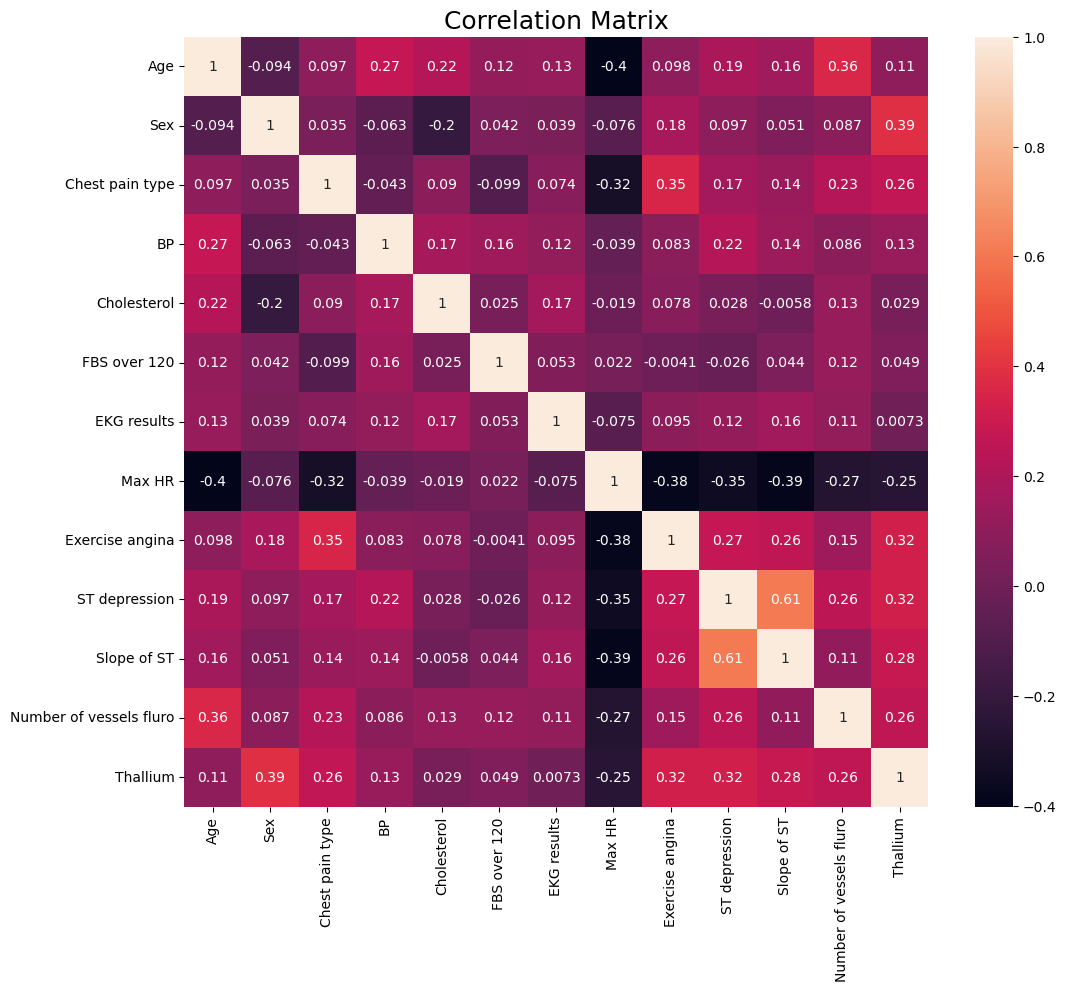

The feature are: {'Exercise angina', 'Slope of ST', 'Thallium', 'Number of vessels fluro'}


In [35]:
from numpy import set_printoptions
plt.figure(figsize=(12,10))
cor = X.corr(method='pearson')
plt.title("Correlation Matrix", fontsize=18)
sns.heatmap(cor,annot=True ,)
plt.show()
def correlation(data , threshold):
    corr_rel = set()
    C = data.corr()
    for i in range(len(C.columns)):
        for j in range(i):
            if abs(C.iloc[i,j]>threshold):
                col_name=C.columns[i]
                corr_rel.add(col_name)
    return corr_rel

feature = correlation(X , 0.3)
len(set(feature))
print("The feature are:",feature)

## 3. Sklearn ensemble ExtraTreesClassifier Method 

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
print(df.columns)

[0.07 0.05 0.1  0.07 0.07 0.02 0.04 0.08 0.08 0.09 0.06 0.12 0.16]
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


## Spliting the data Into training and testing.

In [37]:
# The selected features are here
X = df[['Age','Chest pain type','Cholesterol','Max HR','Exercise angina','ST depression','Number of vessels fluro', 'Thallium']]
Y = df['Heart Disease']

## Model building

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,x_test , Y_train,y_test = train_test_split(X,Y , test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=300)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=300)

## Predicted values for Heart_Disease.

In [39]:
predicted = model.predict(x_test)
print(predicted)

[1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


## Accuracy of model

In [40]:
from sklearn.metrics import accuracy_score
accuray = accuracy_score(predicted,y_test)
print("The accuracy of model  is:",accuray)

The accuracy of model  is: 0.9074074074074074


## Classification report 

In [41]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
classification = classification_report(predicted,y_test, target_names= target_names)
print(classification)

              precision    recall  f1-score   support

     class 0       1.00      0.87      0.93        38
     class 1       0.76      1.00      0.86        16

    accuracy                           0.91        54
   macro avg       0.88      0.93      0.90        54
weighted avg       0.93      0.91      0.91        54



## Confusion matries and Confusion Matrix Display through graph

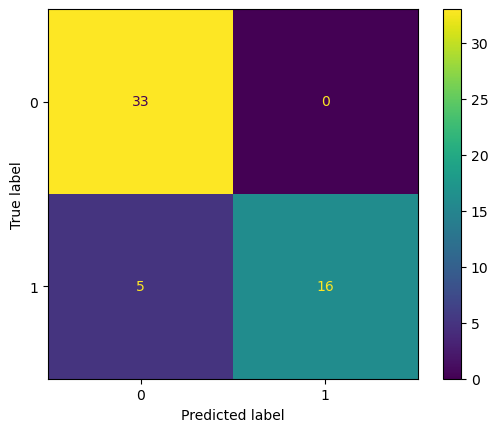

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()